In [10]:
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
df=pd.read_csv('colours_rgb_shades.csv')
df.drop(['Color Name','Credits','RGB Hex','CSS Hex','BG/FG color sample'],axis=1,inplace=True)
df.columns=['RGB']
df

,RGB
0,84;84;84
1,192;192;192
2,190;190;190
3,211;211;211
4,119;136;153
...,...
655,205;127;50
656,230;232;250
657,192;192;192
658,84;84;84


In [12]:
x=np.array(df.RGB)
x=x.reshape(x.shape[0],1)
RGB=[]
for i in range(0,len(x)):
    RGB.append(list(x[i])[0].split(';'))
RGB=np.array(RGB)

In [13]:
R=list(map(int,RGB[:,0]))
G=list(map(int,RGB[:,1]))
B=list(map(int,RGB[:,2]))

In [14]:
df['R']=R
df['G']=G
df['B']=B
df['Rdom']=['0']*660
df['Gdom']=['0']*660
df['Bdom']=['0']*660
del df['RGB']

In [15]:
df

,R,G,B,Rdom,Gdom,Bdom
0,84,84,84,0,0,0
1,192,192,192,0,0,0
2,190,190,190,0,0,0
3,211,211,211,0,0,0
4,119,136,153,0,0,0
...,...,...,...,...,...,...
655,205,127,50,0,0,0
656,230,232,250,0,0,0
657,192,192,192,0,0,0
658,84,84,84,0,0,0


In [16]:
for i in range(0,len(df)):
    max1=max(df.R[i],df.G[i],df.B[i])
    df.Rdom[i]=(max1==df.R[i])*1
    df.Gdom[i]=(max1==df.G[i])*1
    df.Bdom[i]=(max1==df.B[i])*1

c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [17]:
df.R=df.R/255
df.G=df.G/255
df.B=df.B/255

In [18]:
df

,R,G,B,Rdom,Gdom,Bdom
0,0.329412,0.329412,0.329412,1,1,1
1,0.752941,0.752941,0.752941,1,1,1
2,0.745098,0.745098,0.745098,1,1,1
3,0.827451,0.827451,0.827451,1,1,1
4,0.466667,0.533333,0.600000,0,0,1
...,...,...,...,...,...,...
655,0.803922,0.498039,0.196078,1,0,0
656,0.901961,0.909804,0.980392,0,0,1
657,0.752941,0.752941,0.752941,1,1,1
658,0.329412,0.329412,0.329412,1,1,1


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [44]:
X=df[['R','G','B']].values
Y=df[['Rdom','Gdom','Bdom']].values

In [45]:
X=np.asarray(X).astype(np.float32)
Y=np.asarray(Y).astype(np.float32)

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=37)

In [145]:
model=Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [147]:
model.fit(x=X_train,y=y_train,epochs=50)

Train on 594 samples
Epoch 1/50
594/594 [==============================] - 0s 69us/sample - loss: 1.1566 - accuracy: 0.7508
Epoch 2/50
594/594 [==============================] - 0s 44us/sample - loss: 1.1554 - accuracy: 0.7643
Epoch 3/50
594/594 [==============================] - 0s 47us/sample - loss: 1.1553 - accuracy: 0.7357
Epoch 4/50
594/594 [==============================] - 0s 49us/sample - loss: 1.1542 - accuracy: 0.7643
Epoch 5/50
594/594 [==============================] - 0s 49us/sample - loss: 1.1537 - accuracy: 0.7357
Epoch 6/50
594/594 [==============================] - 0s 55us/sample - loss: 1.1527 - accuracy: 0.7542
Epoch 7/50
594/594 [==============================] - 0s 45us/sample - loss: 1.1524 - accuracy: 0.7694
Epoch 8/50
594/594 [==============================] - 0s 52us/sample - loss: 1.1513 - accuracy: 0.7609
Epoch 9/50
594/594 [==============================] - 0s 42us/sample - loss: 1.1505 - accuracy: 0.7593
Epoch 10/50
594/594 [==============================]

In [148]:
loss_df=pd.DataFrame(model.history.history)

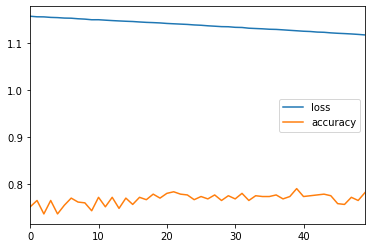

In [149]:
loss_df.plot()

In [150]:
prediction=model.predict(X_test)
prediction=pd.DataFrame(prediction.reshape(66,3,))
pred_df=pd.DataFrame(y_test)
pred_df=pd.concat([pred_df,prediction],axis=1)
pred_df.columns=['true_R','true_G','true_B','pred_R','pred_G','pred_B']

In [151]:
pred_df

,true_R,true_G,true_B,pred_R,pred_G,pred_B
0,1.0,1.0,1.0,0.192968,0.238874,0.190655
1,0.0,1.0,0.0,0.705586,0.116867,0.008345
2,1.0,1.0,1.0,0.203971,0.261898,0.203056
3,0.0,0.0,1.0,0.045954,0.190738,0.456263
4,1.0,1.0,1.0,0.208898,0.272344,0.208632
...,...,...,...,...,...,...
61,1.0,1.0,1.0,0.156632,0.166989,0.150293
62,1.0,0.0,0.0,0.826100,0.063867,0.001964
63,1.0,0.0,0.0,0.658145,0.056348,0.005304
64,1.0,0.0,0.0,0.402768,0.085208,0.018304


In [152]:
from sklearn.metrics import mean_absolute_error

In [153]:
mean_absolute_error(pred_df['true_B'],pred_df['pred_B'])

0.22562602

In [154]:
for i in range(0,len(pred_df)):
    max1=max(pred_df.pred_R[i],pred_df.pred_G[i],pred_df.pred_B[i])
    pred_df.pred_R[i]=(max1==pred_df.pred_R[i])*1
    pred_df.pred_G[i]=(max1==pred_df.pred_G[i])*1
    pred_df.pred_B[i]=(max1==pred_df.pred_B[i])*1

In [155]:
pred_df

,true_R,true_G,true_B,pred_R,pred_G,pred_B
0,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
61,1.0,1.0,1.0,0.0,1.0,0.0
62,1.0,0.0,0.0,1.0,0.0,0.0
63,1.0,0.0,0.0,1.0,0.0,0.0
64,1.0,0.0,0.0,1.0,0.0,0.0


In [158]:
mean_absolute_error(pred_df['true_B'],pred_df['pred_B'])

0.18181819